# Cleaning Data

In [1]:
"""Import Data"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

all_features_df = pd.read_csv('All_features_df.csv')
tickers = all_features_df.Name.unique()
all_features_df['date'] = pd.to_datetime(all_features_df['date'],format='%Y-%m-%d')
all_features_df.set_index(['Name','date'],inplace = True)



In [2]:
"""Removing companies where S&P modifications happened in the 5 year period. 
AAPL was in the index all those years."""
close = all_features_df.dropna()
n_days = len(all_features_df.dropna().loc['AAPL','close'])# ~ 1235 for 5 years. It changes based on num NULL values in generated features
tot = 0
ls = []
for x in tickers:
    if len(close.loc[x,'close']) < n_days: # ~ 1200 days in 5 years. Some d
        tot+=1
#         print(x)
    else:
        ls.append(x)
print('there are a total of %d stocks with missing data \
for partial period (total = %d AAPL)' %(tot,n_days)) # S&P 500 modifications
tickers = ls
features_df = all_features_df.dropna().loc[tickers,:]

there are a total of 37 stocks with missing data for partial period (total = 1235 AAPL)


# Predictive Modelling (in progess)


**Exploration:** <br>
Data Visualization: t-SNE <br>
Data shortening: PCA <br>
Unsupervised Clustering: Heirarchical Clustering, KMeans, Ward HC, Spectral Clustering, GMMs<br>
Supervised Classification: Deep Learning<br>


# Initial Visualization:

## 0.1 t-SNE (very slow- halted)

In [3]:
# from sklearn.manifold import TSNE
# tsne = TSNE(learning_rate = 1000,n_components=2)
# tsne_features = tsne.fit_transform(stocks_df)

# xs = tsne_features[:,0]
# ys = tsne_features[:,1]
# plt.scatter(xs,ys)
# plt.show()

# Extracting Principal Components

## 1.1 PCA

In [4]:
from sklearn.decomposition import PCA

# Unsupervised Clustering

## 2.1 Hierarchical Clustering

Survey of Time Series Clustering Algos: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.115.6594&rep=rep1&type=pdf



Shape of close price matrix =  (468, 1235)


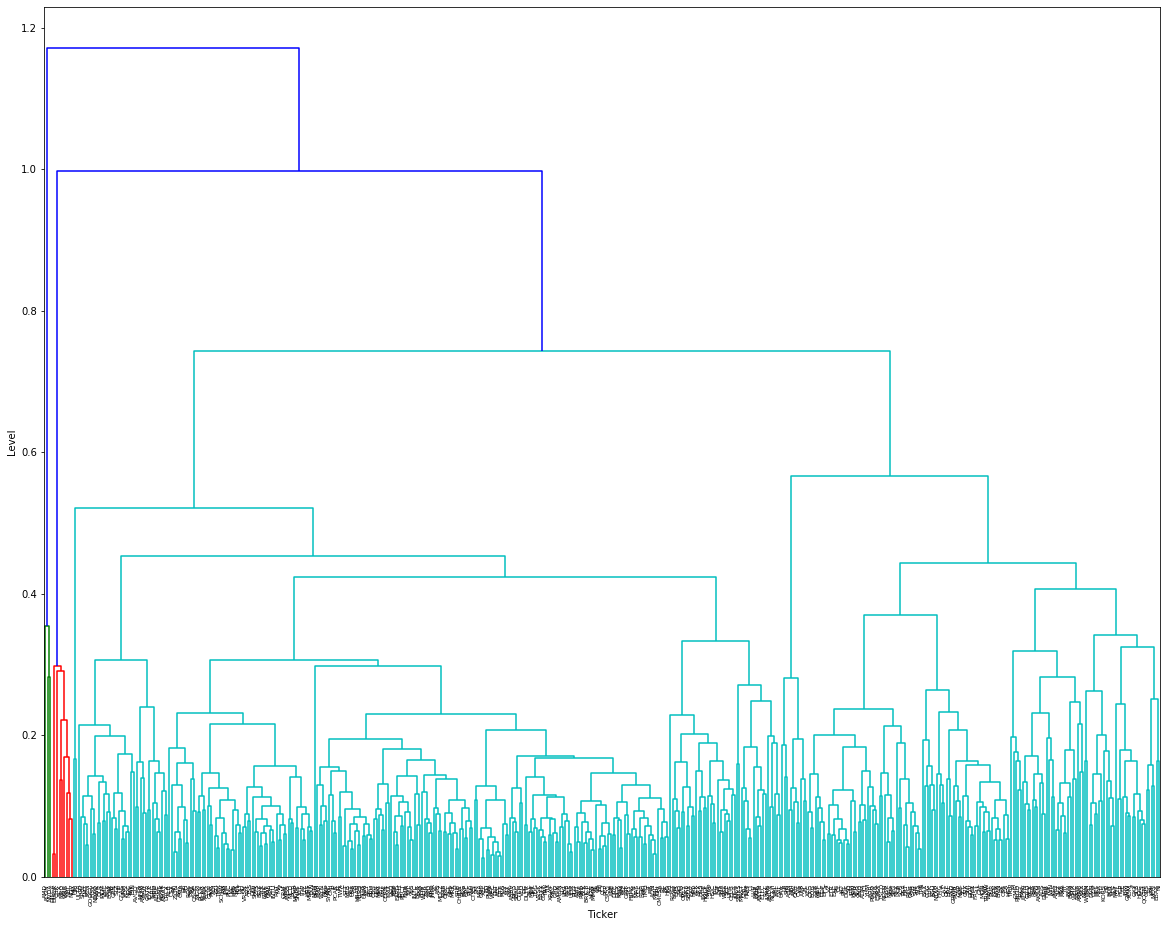

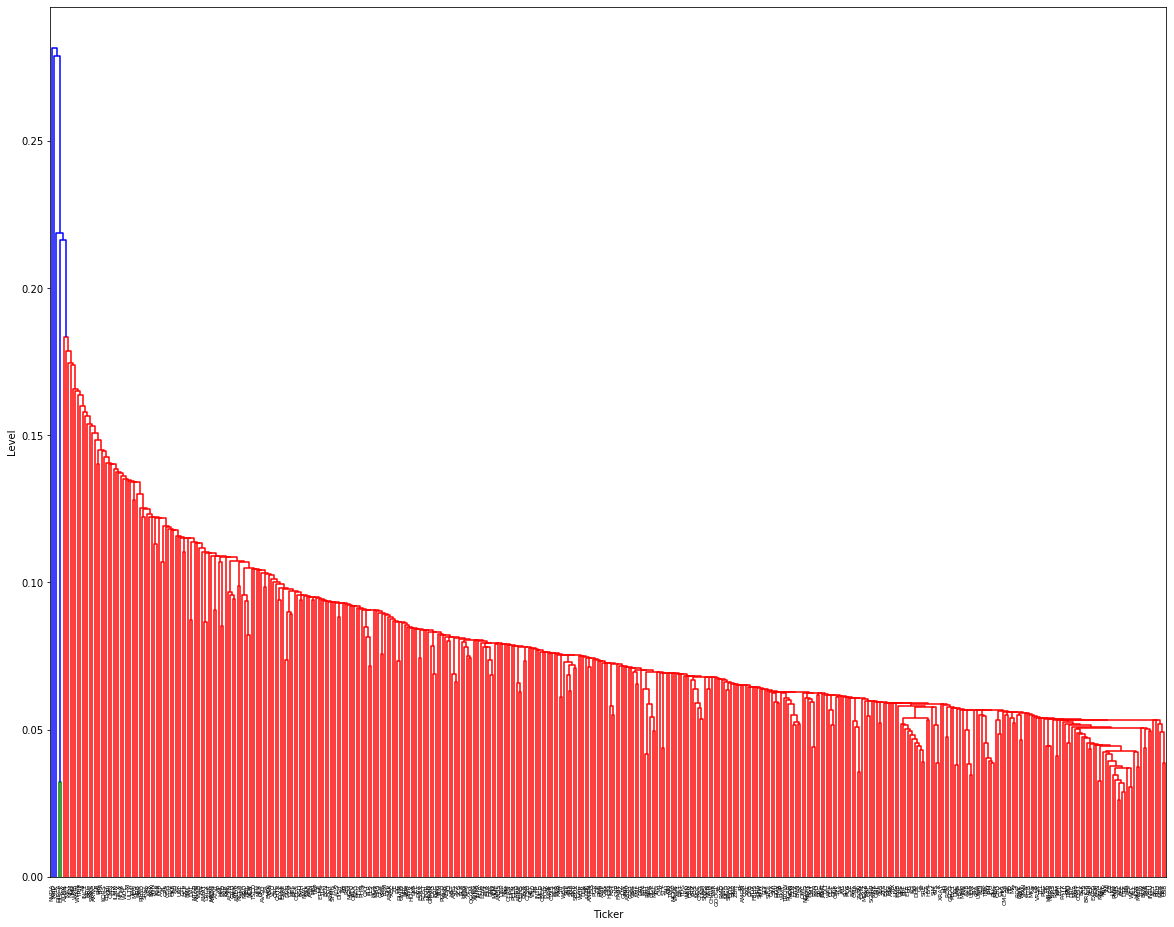

Verify the accuracy of the algo by looking at the S&P 500 index
Companies in Order:
 ['NVDA', 'AMD', 'CHK', 'DISCA', 'DISCK', 'UAA', 'ALGN', 'MAT', 'NEM', 'MU', 'WMB', 'WYNN', 'TRIP', 'NI', 'INCY', 'NRG', 'RRC', 'SWKS', 'ARNC', 'LB', 'SIG', 'TPR', 'KORS', 'EBAY', 'URI', 'CMG', 'STX', 'ILMN', 'FCX', 'NFLX', 'CF', 'WDC', 'M', 'ULTA', 'KMI', 'MOS', 'HRB', 'BBY', 'PRGO', 'SRCL', 'RL', 'XRX', 'BAX', 'JWN', 'KSS', 'ALK', 'AAP', 'FL', 'GPS', 'COG', 'LUV', 'OKE', 'AYI', 'KR', 'UAL', 'CTL', 'HCP', 'FMC', 'AAL', 'DAL', 'NTAP', 'AKAM', 'VIAB', 'EW', 'AMAT', 'LRCX', 'LUK', 'MNST', 'AMZN', 'ATVI', 'HP', 'HAL', 'PXD', 'BIIB', 'MYL', 'ALXN', 'GILD', 'MCK', 'ANDV', 'NCLH', 'APA', 'MRO', 'NBL', 'NOV', 'ALB', 'TSCO', 'FTI', 'NFX', 'CAT', 'AVGO', 'EA', 'BWA', 'TSN', 'VLO', 'CNC', 'CHTR', 'IDXX', 'EXPE', 'APC', 'DVN', 'COP', 'HES', 'RCL', 'CELG', 'KSU', 'PVH', 'NWL', 'CSX', 'ABC', 'AGN', 'HBI', 'TAP', 'GE', 'ETFC', 'TGT', 'BEN', 'EQT', 'KLAC', 'SYMC', 'A', 'ADS', 'DISH', 'BA', 'GT', 'RHI', 'MGM', 'VFC', '

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import normalize

# Using close price as a specific feature.
close = features_df.close
# np.shape(close_prices.values)
close_prices = []
for x in tickers:
    close_prices.append(close[x].values)
print("Shape of close price matrix = ",np.shape(close_prices))
norm_close_prices = normalize(close_prices)
mergings_complete = linkage(norm_close_prices, method='complete')
mergings_single = linkage(norm_close_prices, method='single')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize = (20,16))
close_hierarchy_complete = dendrogram(mergings_complete,
           labels=tickers,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.ylabel('Level')
plt.xlabel('Ticker')
plt.title('Complete Hierarchical Clustering')
plt.savefig('Results/Clustering/Hierarchical_clustering_complete.png', dpi = 300)
plt.show()


plt.figure(figsize = (20,16))
close_hierarchy_single = dendrogram(mergings_single,
           labels=tickers,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.ylabel('Level')
plt.xlabel('Ticker')
plt.title('Single Hierarchical Clustering')
plt.savefig('Results/Clustering/Hierarchical_clustering_single.png', dpi = 300)
plt.show()


print('Verify the accuracy of the algo by looking at the S&P 500 index')
ticker_order = close_hierarchy['ivl']
print('Companies in Order:\n', ticker_order)

## 2.2 KMeans

In [6]:
# from sklearn.preprocessing import Normalizer, StandardScaler
# from sklearn.cluster import KMeans
# from sklearn.pipeline import Pipeline


# #n_clusters = elbow of KMeans.interia_ plot n),  industries ~ 11
# stocks_df.dropna(inplace = True)
 
# kmeans_pipeline = Pipeline(steps = [('nrml',Normalizer()),('clf',KMeans(n_clusters = 11))]) #('norm', Normalizer())
# kmeans_pipeline.fit(stocks_df)
# labels = kmeans_pipeline.predict(stocks_df)
# stocks_df.describe()
# plt.plot(labels)
# plt.show()
# print(labels)

# # Cross Tabulation to see effectiveness of split
# df_res = pd.DataFrame({'labels': labels,'companies': stocks_df.index})
# res = pd.crosstab(df_res['labels'], df_res['companies'])
# print(res)

# # Another trial
# # df = stored_df.reset_index().pivot(index = 'date', columns='Name')
# # df.columns = df.columns.swaplevel(0, 1)
# # df.sort_index(axis=1, level=0, inplace=True)
# # df

## 2.3 Dynamic Time Warping (DTW)

Used instead of K-Means as a way to cluster time series data.
https://www.cs.ucr.edu/~eamonn/time_series_data_2018/

# Supervised Clustering

Based on partial target data from https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

## 3. Deep Learning